# Assignment - 2

# Abstract

Through this assignment, we are taking dataset , exploring the dataset which has categorical and multiclass variables and then performing regression models on this dataset. Inorder to perform regression models, we need to train, validate and perform regression on the entire dataset.

I have taken "Online Shopper's Intention Dataset" and trying to analyze and perform regression models on this dataset.Target variable is Revenue which is a boolean field. 

### About dataset

This dataset depicts the data of visitors visiting the page and whether they contribute in generating revenue. Different parameters are considered which are as follows:
Administrative, Adminstrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, ExitRates, BounceRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend and Revenue. 

Here the taget variable is Revenue.

### Aim/Purpose

Purpose of this assignment is used to use explore data, train , validate data using different regression techniques. 

### Methods Used

Linear Regression, Logistic Regression, Step-wise regression


In [153]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

   In the above line of code, we have imported necessary libraries which we will be using in this assignment. 
   In below line of code, we are reading the dataset and checking the headers and describing the dataset in general. 

In [154]:
df = pd.read_csv('online_shoppers_intention.csv')

In [155]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [156]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [157]:
print('Number of samples:',len(df))

Number of samples: 12330


  From the below line of code, we are trying to find correlation of the variables present in the dataframe. 

In [158]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


### Exploring the dataset

From below lines of codes, let us try to find relationship between different variables and checking how one variable is impacting the target variable i.e. Revenue. 

Heatmaps, scatterplots, pairplots are used to find the linear relationship between different variables. 

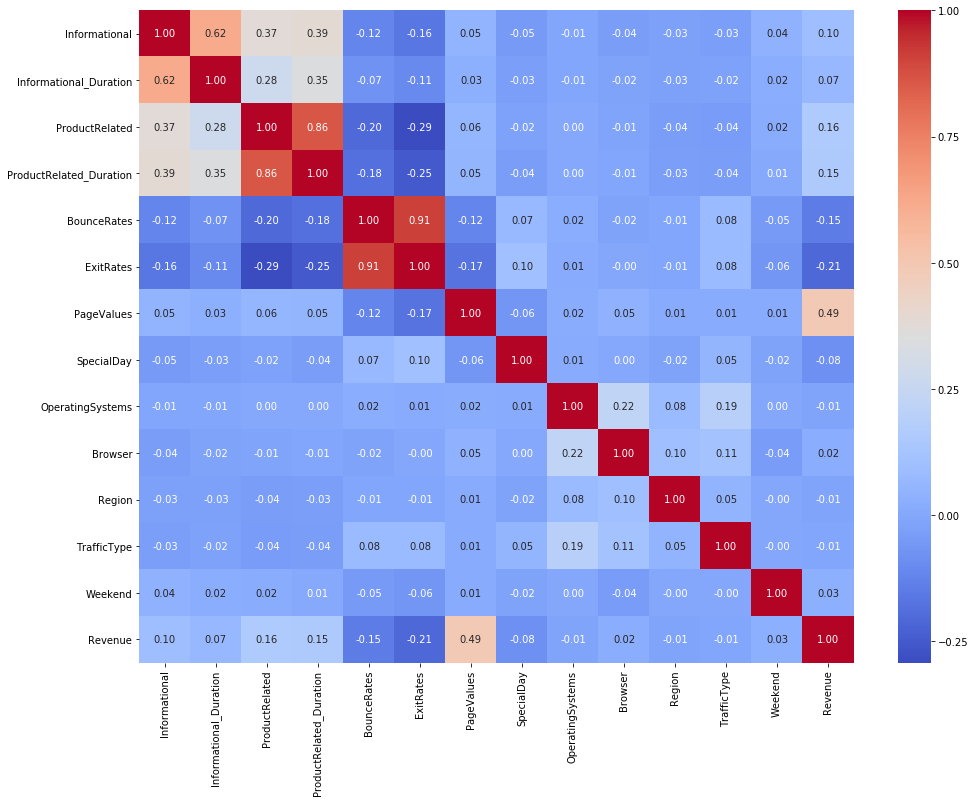

In [159]:
import seaborn as sns
#sns.heatmap(df.corr())

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [160]:
x = df[['Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

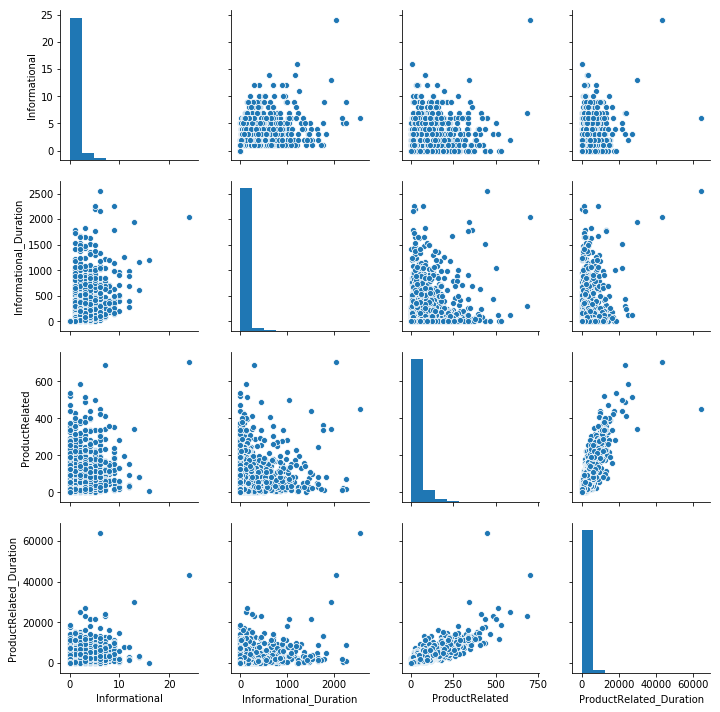

In [162]:
sns.pairplot(x)

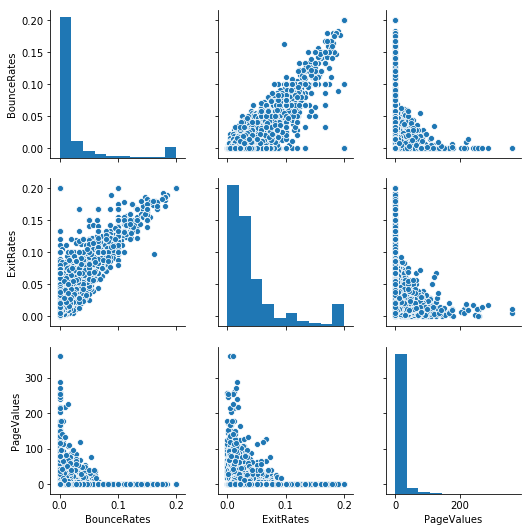

In [163]:
y = df[['BounceRates','ExitRates','PageValues',]]
import seaborn as sns
sns.pairplot(y)

In [165]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [166]:
df = df.rename(columns={'Revenue':'Target_Revenue'})

In [167]:
#df.Target_Revenue.replace(('True', 'False'), (1, 0), inplace=True)
df.Target_Revenue = df.Target_Revenue.astype(str)

In [168]:
df.Target_Revenue

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
12300    False
12301    False
12302    False
12303    False
12304    False
12305    False
12306    False
12307    False
12308    False
12309    False
12310    False
12311     True
12312     True
12313     True
12314    False
12315    False
12316    False
12317    False
12318    False
12319    False
12320    False
12321    False
12322    False
12323    False
12324    False
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Target_Revenue, Length: 12330, dtype: object

In [169]:
df.Target_Revenue.replace(('True', 'False'), (1, 0), inplace=True)


In [170]:
df.Target_Revenue = df.Target_Revenue.astype(int)

In [242]:
df.groupby('Target_Revenue').size()

Target_Revenue
0    10422
1     1908
dtype: int64

In Line 53, we are trying to find how many values are 0 and 1 respectively.

It is important to calculate prevalence inorder to know quantity of data lying in positive class and negative class. Positive class represents data which is close to target variable and negative class shows quantity of data which is far from the target value. 

In [243]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [244]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['Target_Revenue'].values))

prevalence of the positive class: 0.155


In [510]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Administrative
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration: 3335 unique values
Informational
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration: 1258 unique values
ProductRelated: 311 unique values
ProductRelated_Duration: 9551 unique values
BounceRates: 1872 unique values
ExitRates: 4777 unique values
PageValues: 2704 unique values
SpecialDay
['0.0' '0.4' '0.8' '1.0' '0.2' '0.6']
Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
OperatingSystems
['1' '2' '4' '3' '7' '6' '8' '5']
Browser
['1' '2' '3' '4' '5' '6' '7' '10' '8' '9' '12' '13' '11']
Region
['1' '9' '2' '3' '4' '5' '6' '7' '8']
TrafficType
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '18'
 '19' '16' '17' '20']
VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']
Weekend
['False' 'True']
Target_Revenue
[0 1]


AttributeError: 'DataFrame' object has no attribute 'unique'

 In below lines of code , we have taken two variables as cols_num and cols_cat where numerical and categorical data is seggregated and stored in these variables respectively. First 5 rows of the numerical column data and categorical column data is displayed.

In [511]:
cols_num = ['Administrative','Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
df[cols_num].head()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0.0,10,627.500000,0.02,0.05,0.0


In [569]:
cols_cat = ['SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
df[cols_cat].head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,Feb,3,3,1,4,Returning_Visitor,True


It is essential to ensure that data in cols_num and cols_cat does not have missing values and hence null values and sum is checked. It is found that no missing values are present in this dataset. 

In [570]:
df[cols_num].isnull().sum()

Administrative             0
Administrative_Duration    0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
dtype: int64

In [571]:
df[cols_cat+['Target_Revenue']].isnull().sum()

SpecialDay          0
Month               0
OperatingSystems    0
Browser             0
Region              0
TrafficType         0
VisitorType         0
Weekend             0
Target_Revenue      0
dtype: int64

In [572]:
df[cols_cat] = df[cols_cat].astype('str')
df_cat= pd.get_dummies(df[cols_cat],drop_first = True)
df_cat

,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
5,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
8,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [573]:
cols_cat = list(df_cat.columns)
cols_input = cols_num + cols_cat 
cols_input

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay_0.2',
 'SpecialDay_0.4',
 'SpecialDay_0.6',
 'SpecialDay_0.8',
 'SpecialDay_1.0',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',
 'TrafficType_18',
 'Tr

In [574]:
df = pd.concat([df,df_cat], axis = 1)

In [575]:
df_data=df[list(df_cat.columns)+cols_num+['Target_Revenue']]
list(df_cat.columns)+cols_num

['SpecialDay_0.2',
 'SpecialDay_0.4',
 'SpecialDay_0.6',
 'SpecialDay_0.8',
 'SpecialDay_1.0',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',
 'TrafficType_18',
 'TrafficType_19',
 'TrafficType_2',
 'TrafficType_20',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'Traf

In [576]:
print('Total number of features:', len(cols_num + cols_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_cat))

Total number of features: 71
Numerical Features: 8
Categorical Features: 63


In [577]:
df[cols_num + cols_cat].isnull().sum().sort_values(ascending = False)

Weekend_True          0
Browser_11            0
Browser_10            0
Browser_10            0
Browser_10            0
OperatingSystems_8    0
OperatingSystems_8    0
OperatingSystems_8    0
OperatingSystems_8    0
OperatingSystems_7    0
OperatingSystems_7    0
OperatingSystems_7    0
OperatingSystems_7    0
OperatingSystems_6    0
OperatingSystems_6    0
OperatingSystems_6    0
OperatingSystems_6    0
OperatingSystems_5    0
OperatingSystems_5    0
OperatingSystems_5    0
OperatingSystems_5    0
OperatingSystems_4    0
OperatingSystems_4    0
OperatingSystems_4    0
OperatingSystems_4    0
OperatingSystems_3    0
OperatingSystems_3    0
OperatingSystems_3    0
OperatingSystems_3    0
OperatingSystems_2    0
                     ..
TrafficType_11        0
TrafficType_15        0
TrafficType_14        0
TrafficType_14        0
TrafficType_14        0
TrafficType_14        0
TrafficType_13        0
TrafficType_13        0
TrafficType_13        0
TrafficType_13        0
TrafficType_12  

In [578]:
df_data.columns

Index(['SpecialDay_0.2', 'SpecialDay_0.2', 'SpecialDay_0.2', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.4', 'SpecialDay_0.4', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.6',
       ...
       'Weekend_True', 'Administrative', 'Administrative_Duration',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Target_Revenue'],
      dtype='object', length=261)

In [579]:
pd.crosstab(index=df["TrafficType"], columns=df["Target_Revenue"])

Target_Revenue,0,1
TrafficType,,
1,2189,262
10,360,90
11,200,47
12,1,0
13,695,43
14,11,2
15,38,0
16,2,1
17,1,0


### Choosing variables of the dataset

After plotting graphs and heatmap along with the correlation, we have taken a new dataframe and added dependent and independent variables. Below line code depicts the same. 

In [580]:
X = df[['Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','Target_Revenue']]
Y = df[['Target_Revenue']]

In [581]:
# Fit the linear model
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(X, Y)

# Print the coefficients
print (results.intercept_, results.coef_)

[6.9388939e-16] [[-2.03915095e-16 -1.00726810e-19 -7.78452833e-17  1.63986924e-18
   9.09996961e-16 -1.31244139e-15  1.00000000e+00]]


In [582]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Target_Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.107e+31
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:44:54   Log-Likelihood:             4.0008e+05
No. Observations:               12330   AIC:                        -8.002e+05
Df Residuals:                   12323   BIC:                        -8.001e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Informational           -5.204e-17   1.83e-17     -2.847      0.004   -8.79e-17   -1.62e-17
Informational_Duration  -3.439e-19   1.62e-19     -2.120      0.034   -6.62e-19   -2.59e-20
ProductRelated          -8.348e-17   7.67e-19   -108.838      0.000    -8.5e-17    -8.2e-17
ProductRelated_Duration  1.811e-18   1.86e-20     97.477      0.000    1.78e-18    1.85e-18
BounceRates               2.22e-16   7.73e-16      0.287      0.774   -1.29e-15    1.74e-15
ExitRates                1.082e-15   6.47e-16      1.673      0.094   -1.86e-16    2.35e-15
Target_Revenue              1.0000   4.82e-17   2.08e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    13762.007   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26209362.972
Skew:                          -4.670   Prob(JB):                         0.00
Kurtosis:                     228.674   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Building Training/Validation/Test Samples

In [583]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [584]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [585]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [586]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [587]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.Target_Revenue.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.Target_Revenue.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.Target_Revenue.values)))

Test prevalence(n = 1850):0.152
Valid prevalence(n = 1849):0.136
Train all prevalence(n = 8631):0.159


In [588]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 12330)


In [589]:
# split the training data into positive and negative
rows_pos = df_train_all.Target_Revenue == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.Target_Revenue.values)))

Train balanced prevalence(n = 2748):0.500


In [590]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [591]:
df_train

,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.6,...,Weekend_True,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Target_Revenue
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0.000000,0.000000,222,8068.742154,0.008326,0.023298,4.789723,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.000000,21,1030.000000,0.005000,0.025000,0.000000,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,24.200000,0.000000,18,1014.200000,0.000000,0.020000,22.977286,1
3,0,0,0,0,0,0,0,0,0,0,...,0,4,30.750000,0.000000,47,1477.394841,0.004167,0.021528,0.000000,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.000000,11,1055.500000,0.018182,0.042424,0.000000,0
5,0,0,0,0,0,0,0,0,0,0,...,1,5,141.000000,0.000000,33,1371.633333,0.000000,0.005556,44.711034,1
6,0,0,0,0,0,0,0,0,1,1,...,0,0,0.000000,0.000000,57,1190.548851,0.007018,0.027310,17.167460,1
7,0,0,0,0,0,0,0,0,0,0,...,0,2,75.000000,0.000000,9,349.000000,0.000000,0.010000,0.000000,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0.000000,0.000000,84,4894.851299,0.002683,0.028447,0.000000,1
9,0,0,0,0,0,0,0,0,0,0,...,0,7,142.350000,0.000000,73,3566.992857,0.000000,0.003947,23.150738,1


In [592]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [593]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [594]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [595]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])

In [596]:
df_mean_in.head()

,col,mean_val
0,Administrative,2.325802
1,Administrative_Duration,81.451868
2,Informational_Duration,34.091648
3,ProductRelated,32.351639
4,ProductRelated_Duration,1219.782556


In [597]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['Target_Revenue'].values
y_valid = df_valid['Target_Revenue'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)
#X_train_all[0]

Training All shapes: (8631, 260)
Training shapes: (2748, 260) (2748,)
Validation shapes: (1849, 260) (1849,)


In [598]:
X_train_all[1]

array([1, 41.125, 0.0, 126, 4310.004668, 0.0006878310000000001,
       0.012822843, 3.451072113, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0,
       '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0,
       0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '1', 1, 1, 1, '0', 0,
       0, 0, '0', 0, 0, 0, '1', 1, 1, 1, '0', 0, 0, 0, '0', 0, 0, 0, '0',
       0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0,
       '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '1', 1, 1, 1, '0', 0, 0,
       0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0,
       0, 0, '0', 0, 0, 0, '1', 1, 1, 1, '0', 0, 0, 0, '0', 0, 0, 0, '0',
       0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0,
       '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0,
       0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0,
       0, 0, '1', 1, 1, 1, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0',
       0, 0, 0, '0', 0, 0, 0, '0', 0, 0, 0, '0', 0,

In [599]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)
X_train_all

C:\Users\Ashmita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[6, 437.39130430000006, 235.55, ..., 0, 0, 0],
       [1, 41.125, 0.0, ..., 0, 0, 0],
       [18, 608.14, 733.8, ..., 1, 1, 1],
       ...,
       [14, 1005.608333, 0.0, ..., 0, 0, 0],
       [0, 0.0, 0.0, ..., 1, 1, 1],
       [0, 0.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [600]:
# your code here
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [601]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [602]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

C:\Users\Ashmita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ashmita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model Selection

### Logistic Regression

Logistic Regression is used when we have the dependent variable as binary to perform predictive analysis. This regression technique is used to measure the relationship between the categorical dependent variable and one or more nominal, ordinal, interval or ratio-level independent variables by estimating the probabilites using a logistic function.

In [603]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [604]:
thresh = 0.5

In [605]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\Ashmita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [606]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.912
accuracy:0.822
recall:0.781
precision:0.850
specificity:0.862
prevalence:0.500
 
Validation:
AUC:0.903
accuracy:0.853
recall:0.790
precision:0.477
specificity:0.863
prevalence:0.136
 


In [607]:
df_train

,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.6,...,Weekend_True,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Target_Revenue
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0.000000,0.000000,222,8068.742154,0.008326,0.023298,4.789723,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.000000,21,1030.000000,0.005000,0.025000,0.000000,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,24.200000,0.000000,18,1014.200000,0.000000,0.020000,22.977286,1
3,0,0,0,0,0,0,0,0,0,0,...,0,4,30.750000,0.000000,47,1477.394841,0.004167,0.021528,0.000000,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.000000,11,1055.500000,0.018182,0.042424,0.000000,0
5,0,0,0,0,0,0,0,0,0,0,...,1,5,141.000000,0.000000,33,1371.633333,0.000000,0.005556,44.711034,1
6,0,0,0,0,0,0,0,0,1,1,...,0,0,0.000000,0.000000,57,1190.548851,0.007018,0.027310,17.167460,1
7,0,0,0,0,0,0,0,0,0,0,...,0,2,75.000000,0.000000,9,349.000000,0.000000,0.010000,0.000000,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0.000000,0.000000,84,4894.851299,0.002683,0.028447,0.000000,1
9,0,0,0,0,0,0,0,0,0,0,...,0,7,142.350000,0.000000,73,3566.992857,0.000000,0.003947,23.150738,1


### Linear Regression Model

Linear regression is linear approach to modelling which depicts the relationship between dependent variable and independent variables. 

In [608]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import time
import numpy as np

def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [609]:
df_train = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

In [610]:
col2use = df[['Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','Target_Revenue']]
Y = df[['Target_Revenue']]

In [611]:
df.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                        object
Month                             object
OperatingSystems                  object
Browser                           object
Region                            object
TrafficType                       object
VisitorType                       object
Weekend                           object
Target_Revenue                     int32
SpecialDay_0.2                    object
SpecialDay_0.4                    object
SpecialDay_0.6                    object
SpecialDay_0.8                    object
SpecialDay_1.0                    object
Month_Dec                         object
Month_Feb       

In [612]:
# Fit the linear model
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(col2use, Y)

# Print the coefficients
print (results.intercept_, results.coef_)

[6.9388939e-16] [[-2.03915095e-16 -1.00726810e-19 -7.78452833e-17  1.63986924e-18
   9.09996961e-16 -1.31244139e-15  1.00000000e+00]]


In [613]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(Y, col2use)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Target_Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.107e+31
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:45:21   Log-Likelihood:             4.0008e+05
No. Observations:               12330   AIC:                        -8.002e+05
Df Residuals:                   12323   BIC:                        -8.001e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Informational           -5.204e-17   1.83e-17     -2.847      0.004   -8.79e-17   -1.62e-17
Informational_Duration  -3.439e-19   1.62e-19     -2.120      0.034   -6.62e-19   -2.59e-20
ProductRelated          -8.348e-17   7.67e-19   -108.838      0.000    -8.5e-17    -8.2e-17
ProductRelated_Duration  1.811e-18   1.86e-20     97.477      0.000    1.78e-18    1.85e-18
BounceRates               2.22e-16   7.73e-16      0.287      0.774   -1.29e-15    1.74e-15
ExitRates                1.082e-15   6.47e-16      1.673      0.094   -1.86e-16    2.35e-15
Target_Revenue              1.0000   4.82e-17   2.08e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    13762.007   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26209362.972
Skew:                          -4.670   Prob(JB):                         0.00
Kurtosis:                     228.674   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [614]:
# load the means
df_mean = pd.read_csv('df_mean.csv', names =['col','mean_val'])


In [615]:
# fill missing
#df_train = fill_my_missing(df_train, df_mean)
#df_valid = fill_my_missing(df_valid, df_mean)

In [616]:
# create X and y matrices
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['default_yes'].values
y_valid = df_valid['default_yes'].values

print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

# create scaler
scaler  = StandardScaler()
scaler.fit(X_train)

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

ValueError: Must pass DataFrame with boolean values only

### Train a linear regression model

In [617]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [618]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [619]:
# Train the model using the training sets
regr.fit(X_train_tf, y_train)

# Make predictions using the testing set
y_pred_valid = regr.predict(X_valid_tf)

In [620]:
y_pred_valid[:5]

array([0.53360718, 0.38498658, 0.54013794, 0.18015259, 0.44065064])

In [621]:
y_valid[:5]

array([1, 0, 0, 0, 0])

In [622]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 3.72610635e-02 -7.44082987e-03  2.00015340e-02 -2.06821434e-02
  5.36374432e-02  8.43626117e-02 -1.79144099e-01  1.25271414e-01
 -9.82125195e+11  7.26223165e+11 -2.10701145e+12  2.36291348e+12
  3.63361524e+12  1.31800640e+12 -4.83225306e+12 -1.19368589e+11
  1.71795697e+12 -2.45003168e+12  2.63575850e+12 -1.90368379e+12
 -1.21120305e+12 -4.49480456e+11  2.55445625e+11  1.40523789e+12
  1.63191048e+11  1.00253029e+12  7.40380092e+10 -1.23975935e+12
 -3.40501314e+11 -1.20568401e+12  3.33620067e+12 -1.79001535e+12
  2.56765776e+11 -8.98438180e+11  3.17816580e+12 -2.53649340e+12
 -2.07797678e+12  2.25820129e+12 -1.11852981e+12  9.38305300e+11
 -3.14280770e+12  8.42128583e+11  1.98085782e+12  3.19821291e+11
  3.27897426e+12 -1.27675161e+12 -1.19507814e+12 -8.07144513e+11
  1.86326686e+12 -1.78973986e+12  2.77345031e+12 -2.84697732e+12
 -1.92119032e+11 -2.34391743e+12 -1.89476348e+12  4.43079995e+12
  8.32473727e+11  1.13932298e+12 -4.10639754e+12  2.13460083e+12
  1.90321

We can evaluate the performance using mean squared error and R^2. 

In [623]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, y_pred_valid))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_valid, y_pred_valid))

# Calculating R-squared value
r_squared = r2_score(y_valid, y_pred_valid)
print("R-squared value: %.2f" %r2_score(y_valid, y_pred_valid))

#Calculating adjusted R2
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-df.shape[1]-1)
print("Adjusted R-squared value: %.2f" %adjusted_r_squared)
#Calculating RMSe
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_valid, y_pred_valid))
print("RMSe: %.2f" %rms)

Mean squared error: 0.17
Variance score: -0.41
R-squared value: -0.41
Adjusted R-squared value: -0.44
RMSe: 0.41


### Multi-collinearity 

Multi-collinearity depicts the relationship between two or more highly correlated variables. Inorder to find multi-collinearity, we need to find 3 factors:

Lets calculate VIF and Tolerance. 


In [626]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.0,Informational
1,1.8,Informational_Duration
2,5.6,ProductRelated
3,5.6,ProductRelated_Duration
4,5.5,BounceRates
5,5.7,ExitRates
6,1.2,Target_Revenue


In [627]:
#To calculate Tolerance

t = (1-r_squared)
print(t)

1.4081457944335702


## Conclusions

Here is the below conclusion:

1. ProductRelated and ProductRelated_Duration, BounceRates are multi-collinear. 
2. Tolerance is calculated to be 1.427
3. After performing regression models, it is found that logistic regression is better approach. 
4. R-squared value is found to be close to 1. 

## Contributions

I have made contributions to 60% of the code and rest have been referred from different examples on internet.

## Citations

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers’+Purchasing+Intention+Dataset#

Panda documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html , 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Seaborn documentation - https://seaborn.pydata.org/generated/seaborn.boxplot.html

Matplotlib documentation - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html 

Understanding inplace parameter - https://stackoverflow.com/questions/43893457/python-pandas-understanding-inplace-true

Understanding fillna method - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

https://www.statisticssolutions.com/assumptions-of-linear-regression/

## License

Copyright <2019> <ASHMITA NIGAM>
 
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.